In [ ]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

#ekstraksi Dataset
!unzip "/content/drive/My Drive/dataset/data_X-Ray.zip" -d "/content/drive/My Drive/dataset/covid19/"

Mounted at /content/drive
Archive:  /content/drive/My Drive/dataset/data_X-Ray.zip
replace /content/drive/My Drive/dataset/covid19/covid/000008.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/My Drive/dataset/covid19/covid/000008.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000008.png  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000008-8.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000009.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000009-5.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000010.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000010-2.png  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000010-5.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000011-6.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000012.jpg  
  inflating: /content/drive/My Drive/dataset/covid19/covid/000012-1.jpg  
  infla

In [ ]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/My Drive/dataset/covid19/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/dataset/covid19/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(70,70))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah covid : 50
Jumlah normal : 50


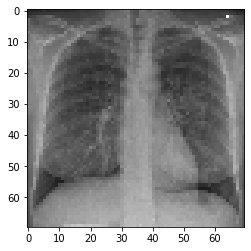

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

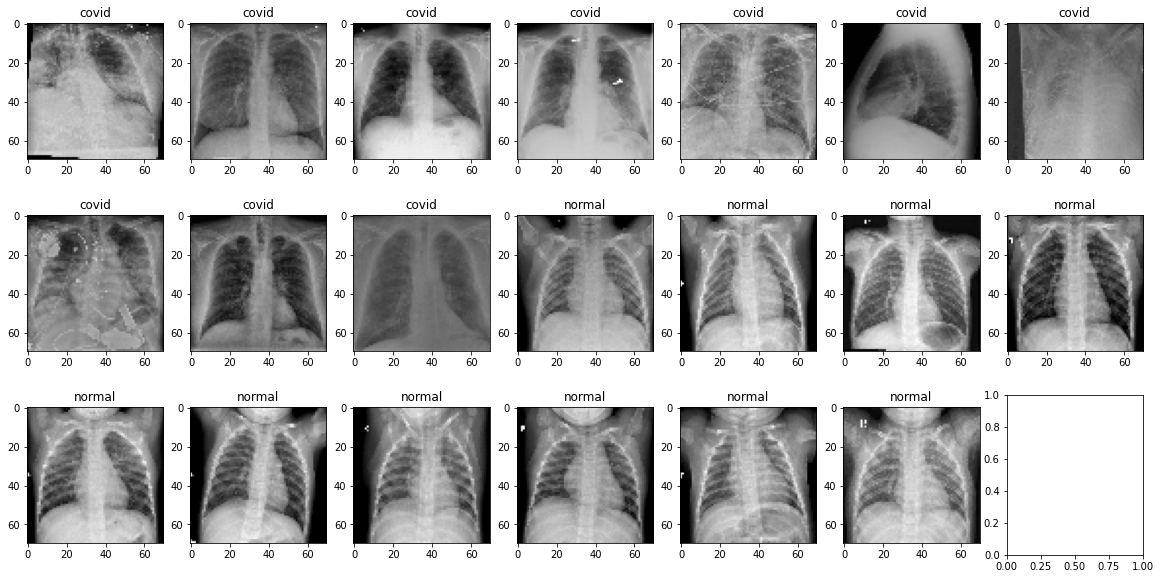

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 7, figsize=(20,10))
cnt = 0
row = 0
col = 0
for i in im_arr:
  for key, value in i.items():
    if(cnt==7):
      row = row + 1
      col = 0
      cnt = 0
    axs[row, col].imshow(value)
    axs[row, col].set_title(key)
    cnt = cnt + 1
    col = col + 1

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
len(y_test)

33

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(2, activation='softmax')) #softmax works

In [ ]:
from tensorflow.keras.optimizers import SGD
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint

# es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=0)
# mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=0, save_best_only= True)

In [ ]:
# hist = model.fit(X_train, y_train, epochs= epochs, validation_data=(X_test, y_test) , callbacks=[es,mc])
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# h = hist.history
# h.keys()

In [ ]:
# plt.plot(h['accuracy'])
# plt.plot(h['val_accuracy'] , c = "red")
# plt.title("acc vs v-acc")
# plt.show()

In [ ]:
# plt.plot(h['loss'])
# plt.plot(h['val_loss'] , c = "red")
# plt.title("loss vs v-loss")
# plt.show()

In [ ]:
# from keras.preprocessing import image

# def get_img_array(img_path):
#   """
#   Input : Takes in image path as input 
#   Output : Gives out Pre-Processed image
#   """
#   path = img_path
#   img = image.load_img(path, target_size=(224,224,3))
#   img = image.img_to_array(img)/255
#   img = np.expand_dims(img , axis= 0 )
  
#   return img

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)

# path = "/content/drive/MyDrive/dataset/covid19/Copy of 9a4e0141fd7681c4026b55b4e13914_jumbo-2.jpeg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
# img = get_img_array(path)

# res = y[np.argmax(model.predict(img))]
# print(f"The given X-Ray image is of type = {res}")
# print()
# print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
# print()
# print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# # to display the image  
# plt.imshow(img[0], cmap = "gray")
# plt.title("input image")
# plt.show()

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=30)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
3/3 [==============================] - 0s 142ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.1522 - val_accuracy: 0.9394
Epoch 2/25
3/3 [==============================] - 0s 133ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9394
Epoch 3/25
3/3 [==============================] - 0s 131ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.9697
Epoch 4/25
3/3 [==============================] - 0s 133ms/step - loss: 0.0434 - accuracy: 0.9851 - val_loss: 0.0816 - val_accuracy: 0.9394
Epoch 5/25
3/3 [==============================] - 0s 139ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9394
Epoch 6/25
3/3 [==============================] - 0s 132ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1555 - val_accuracy: 0.9394
Epoch 7/25
3/3 [==============================] - 0s 131ms/step - loss: 0.0289 - accuracy: 0.9851 - val_loss: 0.1585 - val_accuracy: 0.9394
Epoch 8/25
3/3 [====

In [ ]:
# from keras.models import load_model
# model = load_model("bestmodel.h5")

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=["COVID","NORMAL"]))

              precision    recall  f1-score   support

       COVID       1.00      0.89      0.94        19
      NORMAL       0.88      1.00      0.93        14

    accuracy                           0.94        33
   macro avg       0.94      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9393939393939394


array([[17,  2],
       [ 0, 14]])

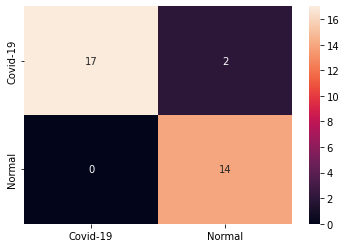

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["Covid-19", "Normal"], yticklabels=["Covid-19", "Normal"])